In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path

In [2]:
def infection(S, I, N, iterations, I_comp, S_comp, beta):    
    for i in range(iterations):
        S, I = S - beta * ((S * I) / N), I + beta * ((S * I) / N)
        S_comp.append(S)
        I_comp.append(I)

In [3]:
def SI_mse_calc(N,contamine):
    mse = 1000000000000
    iterations = len(contamine)
    betarange = np.linspace(0,100,101)
    for pas in betarange:
        S = N - 1
        I = 1
        S_comp = [] # infected compartment
        I_comp = [] # susceptible compartment
        beta = pas/100
        infection(S, I, N, iterations, I_comp, S_comp, beta)
        newmsi = np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean()
        if(newmsi < mse):
            mse = newmsi
            betavalue = beta
    return [mse,betavalue]

## Densité population 1/2

### 5000 individus

In [4]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population5000"

In [5]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0     6  2814146        0      0  2814153
   Init    Run  Mesures  Close  Total
0   597  11460        0      0  12059


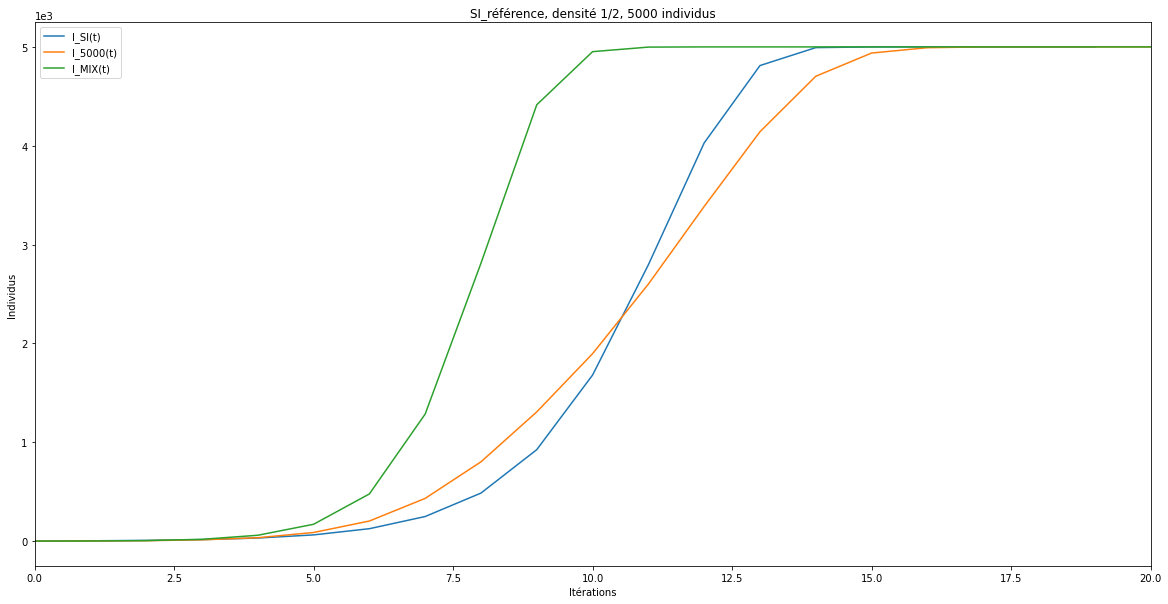

In [6]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1
iterations = 20

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [7]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  5195.916296300865  pour un paramètre beta =  0.97
MSE minimal (I_MIX,I_SI) :  176595.48590795283  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  165058.33


### 20000 individus

In [8]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population20000"

In [9]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   244  8586801        2      1  8587050
   Init    Run  Mesures  Close  Total
0   379  44484        2     33  44899


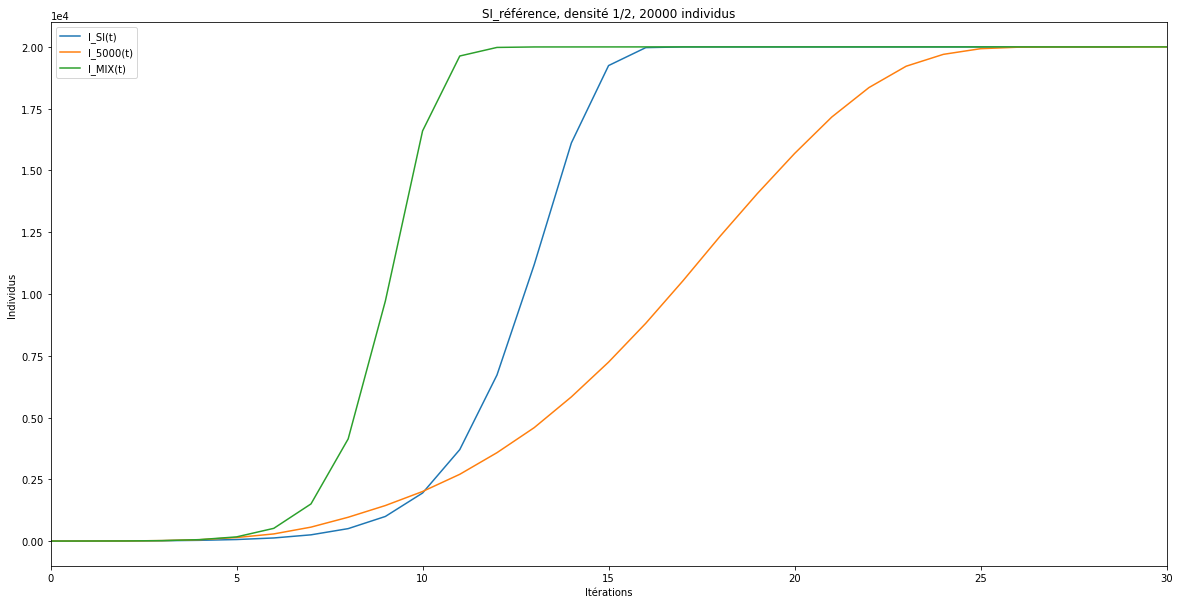

In [10]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [11]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  359247.247697743  pour un paramètre beta =  0.7
MSE minimal (I_MIX,I_SI) :  4142604.592014477  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  8936453.705


### 50000 individus

In [12]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population50000"

In [13]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   409  15869584        5      2  15870002
   Init     Run  Mesures  Close   Total
0   251  107678       61      3  107994


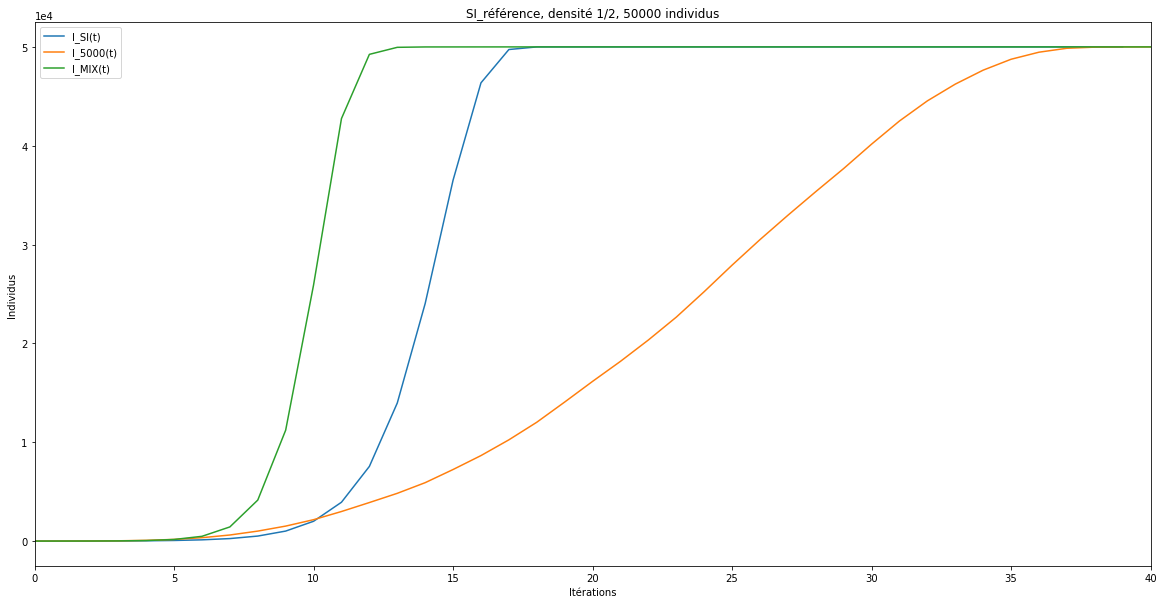

In [14]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [15]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  5855117.207944832  pour un paramètre beta =  0.52
MSE minimal (I_MIX,I_SI) :  30498829.84498971  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  111310848.615


### 100000 individus

In [16]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population100000"

In [17]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   300  22839924        4      3  22840233
   Init     Run  Mesures  Close   Total
0   942  201830       62     61  202897


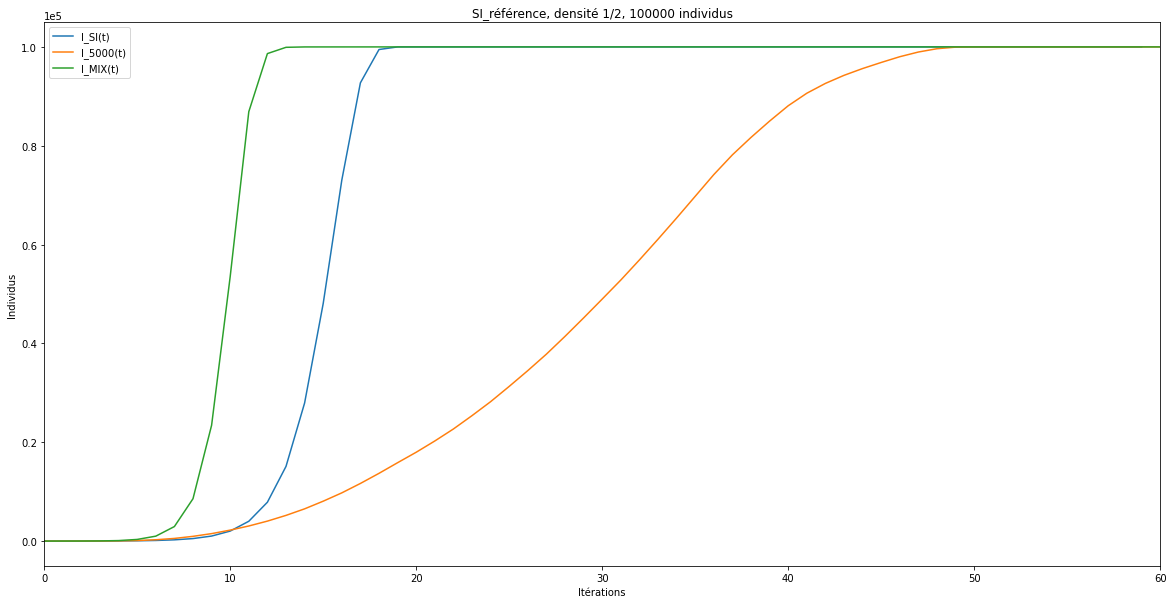

In [18]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1
iterations = 60

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [19]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  32547465.082639426  pour un paramètre beta =  0.43
MSE minimal (I_MIX,I_SI) :  170995698.96261206  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  686277020.24


## Densité population 1/4

### 5000 individus

In [20]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population5000"

In [21]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   246  3201378        0      0  3201625
   Init    Run  Mesures  Close  Total
0   624  11435        0      0  12060


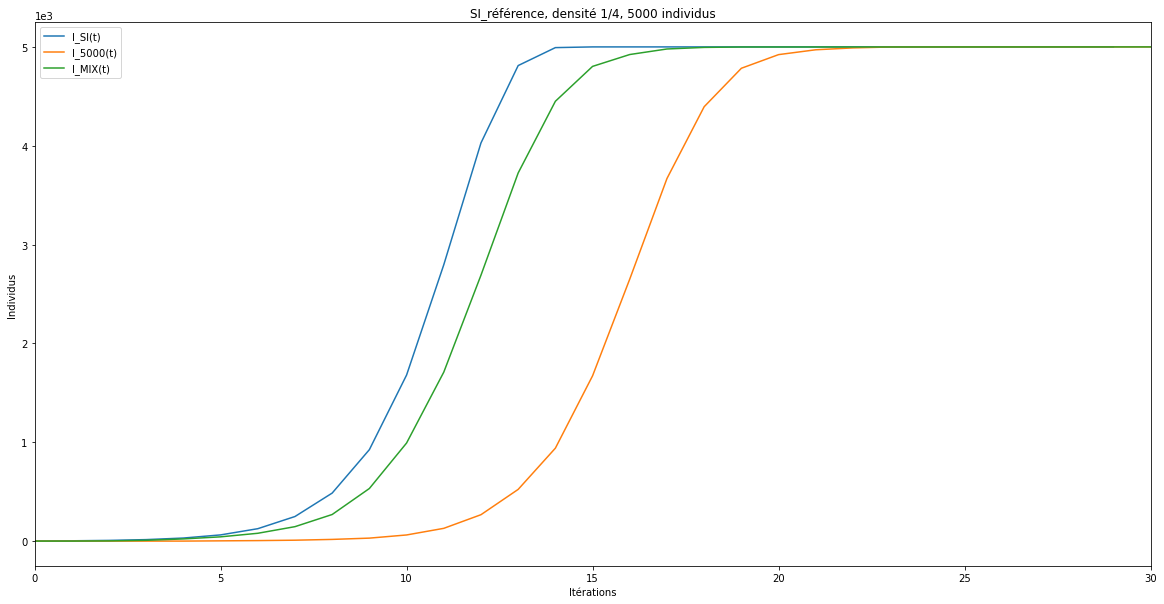

In [22]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [23]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  3207.2514699807007  pour un paramètre beta =  0.63
MSE minimal (I_MIX,I_SI) :  249.26149128946102  pour un paramètre beta =  0.89
MSE (I_5000,I_MIX) :  246086.17


### 20000 individus

In [24]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population20000"

In [25]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   328  9598439        2      9  9598780
   Init    Run  Mesures  Close  Total
0   317  43178       25      1  43522


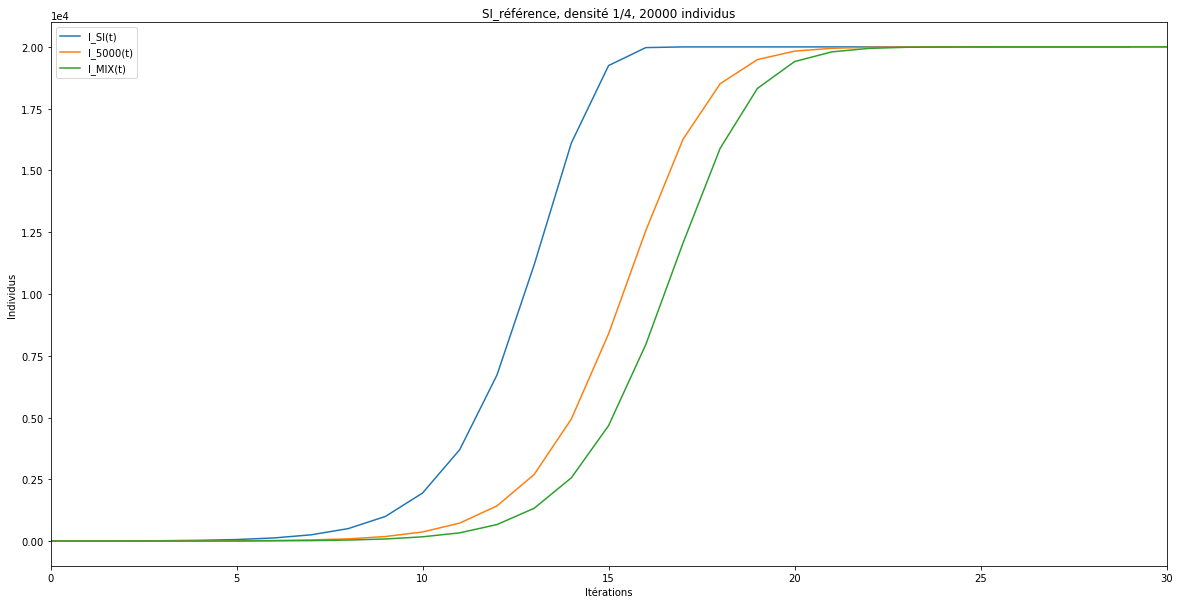

In [26]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [27]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  4885.144292385207  pour un paramètre beta =  0.79
MSE minimal (I_MIX,I_SI) :  13774.082565082284  pour un paramètre beta =  0.73
MSE (I_5000,I_MIX) :  347189.305


### 50000 individus

In [28]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population50000"

In [29]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   182  17651728        5      2  17651919
   Init     Run  Mesures  Close   Total
0   779  105289        5     58  106133


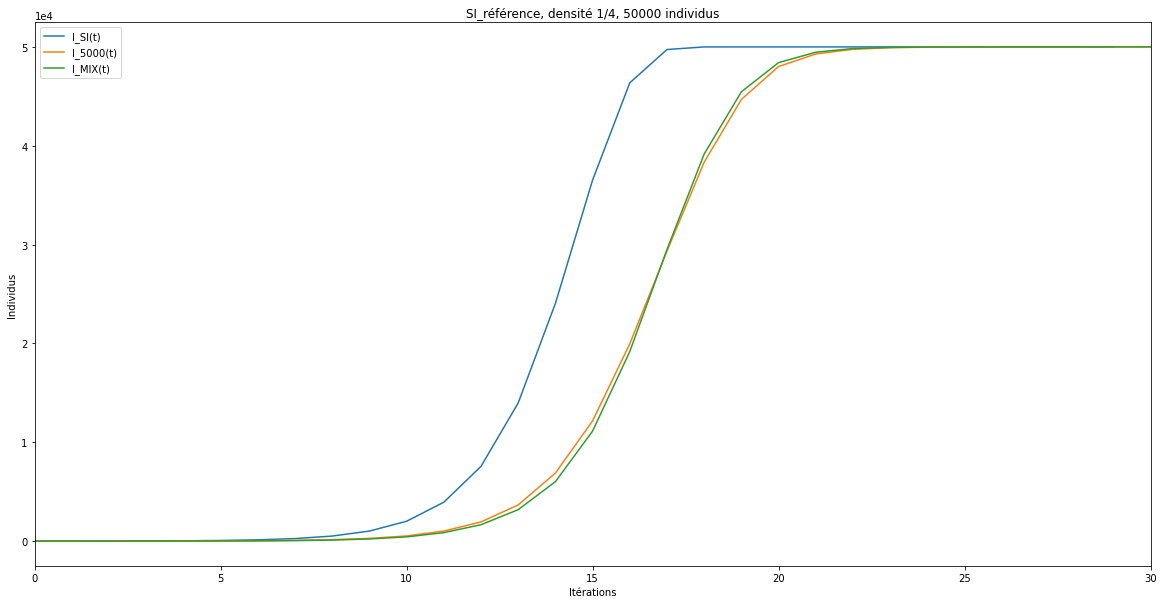

In [30]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [31]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  25630.183761833534  pour un paramètre beta =  0.81
MSE minimal (I_MIX,I_SI) :  25282.18762540852  pour un paramètre beta =  0.81
MSE (I_5000,I_MIX) :  21380.24


### 100000 individus

In [32]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population100000"

In [33]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   626  24010907        4      3  24011542
   Init     Run  Mesures  Close   Total
0   981  201996       57     53  203089


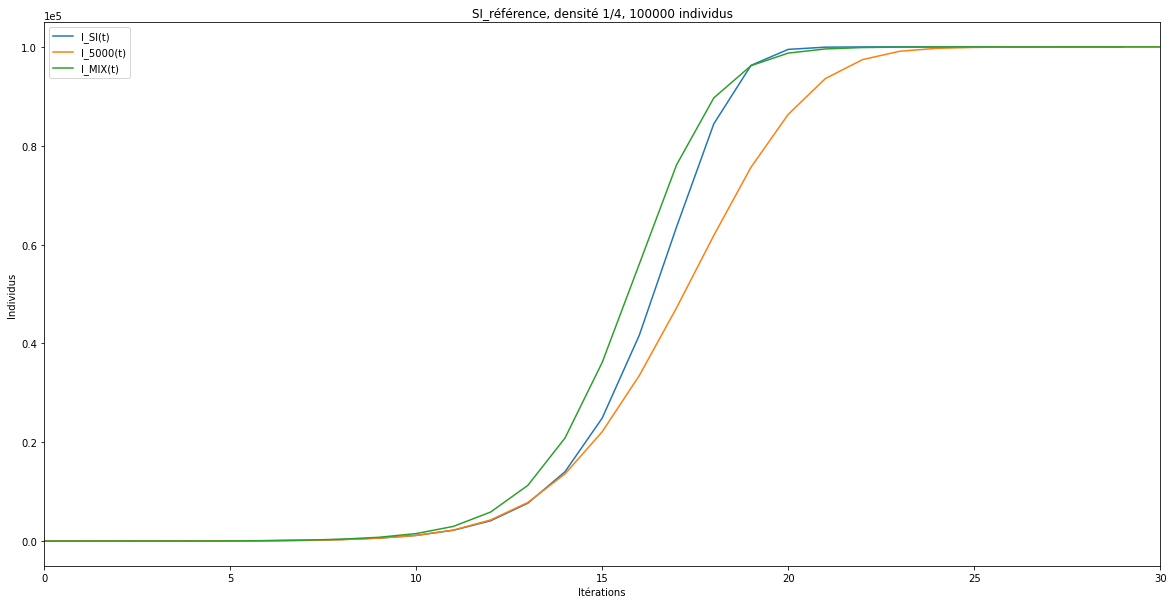

In [34]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.9
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [35]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  1539838.3803886848  pour un paramètre beta =  0.84
MSE minimal (I_MIX,I_SI) :  250541.20142312863  pour un paramètre beta =  0.94
MSE (I_5000,I_MIX) :  15020247.235


## Densité population 1/8

### 5000 individus

In [36]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population5000"

In [37]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   437  3357777        0     16  3358231
   Init    Run  Mesures  Close  Total
0     7  10851        0      4  10863


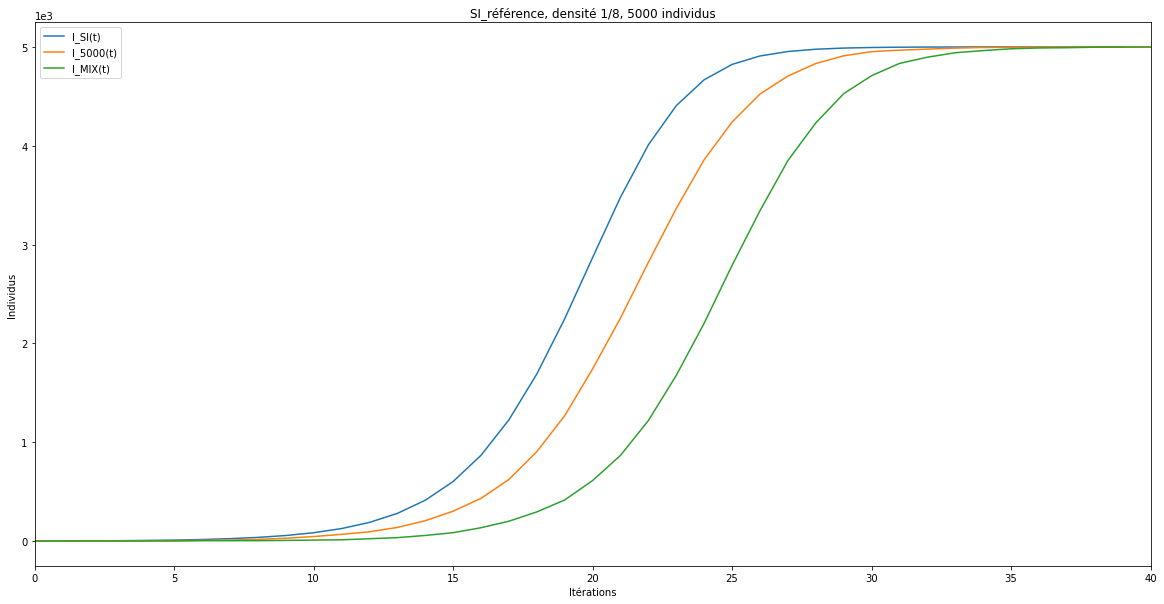

In [38]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.5
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [39]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  349.1924076253355  pour un paramètre beta =  0.45
MSE minimal (I_MIX,I_SI) :  2682.6010581733517  pour un paramètre beta =  0.39
MSE (I_5000,I_MIX) :  88148.37


### 20000 individus

In [40]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population20000"

In [41]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   419  10103169        2      1  10103593
   Init    Run  Mesures  Close  Total
0   695  42523       54      1  43274


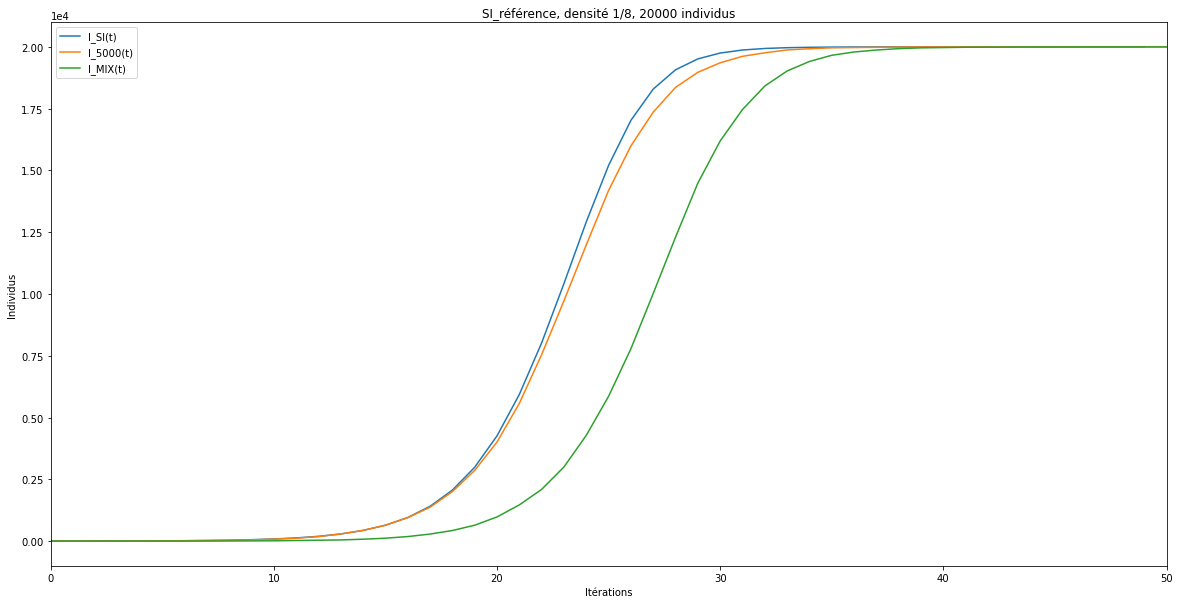

In [42]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.5
iterations = 50

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [43]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  5416.205112570368  pour un paramètre beta =  0.49
MSE minimal (I_MIX,I_SI) :  18452.756065922407  pour un paramètre beta =  0.41
MSE (I_5000,I_MIX) :  2175715.895


### 50000 individus

In [44]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population50000"

In [45]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   124  18155709        5      2  18155841
   Init     Run  Mesures  Close   Total
0    21  103645       60      3  103731


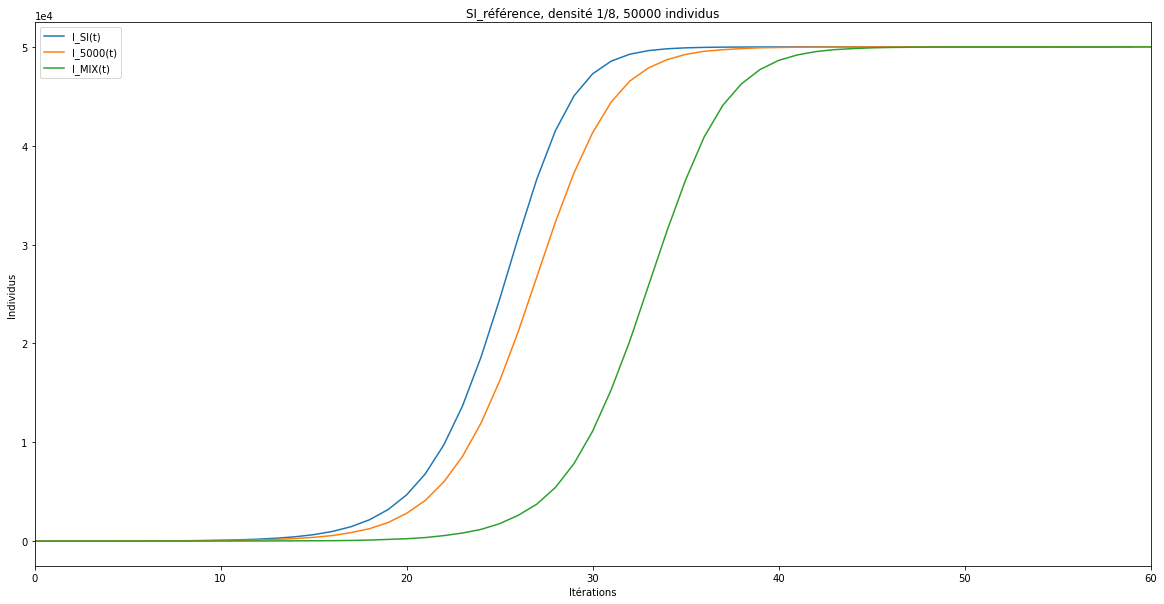

In [46]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.5
iterations = 60

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [47]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  63440.95860212294  pour un paramètre beta =  0.46
MSE minimal (I_MIX,I_SI) :  304721.17387056316  pour un paramètre beta =  0.37
MSE (I_5000,I_MIX) :  32123314.76


### 100000 individus

In [48]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population100000"

In [49]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   155  24628461        4      3  24628625
   Init     Run  Mesures  Close   Total
0  1539  194612       57     54  196264


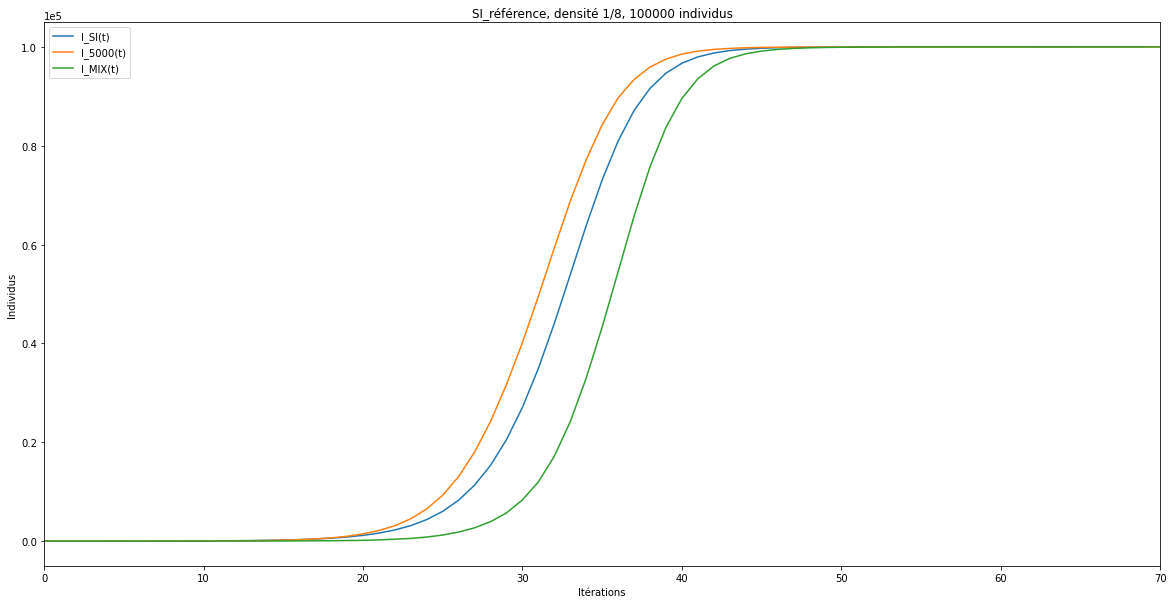

In [50]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.4
iterations = 70

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [51]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  149063.85683224388  pour un paramètre beta =  0.42
MSE minimal (I_MIX,I_SI) :  1695668.1010908699  pour un paramètre beta =  0.36
MSE (I_5000,I_MIX) :  70643437.525


## Densité population 1/16

### 5000 individus

In [52]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population5000"

In [53]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   298  3327656        0      0  3327956
   Init    Run  Mesures  Close  Total
0  1013  16158       36      0  17208


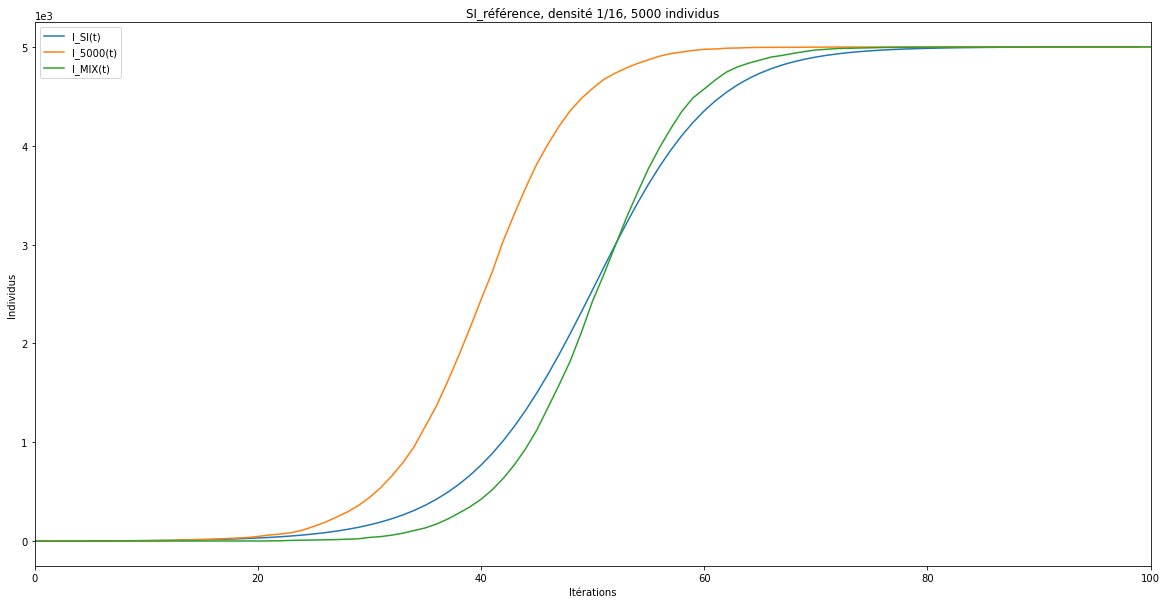

In [54]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.18
iterations = 100

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [55]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]


print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  2858.4573145558697  pour un paramètre beta =  0.23
MSE minimal (I_MIX,I_SI) :  7548.230214662392  pour un paramètre beta =  0.18
MSE (I_5000,I_MIX) :  465554.28


### 20000 individus

In [56]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population20000"

In [57]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   286  9869780        2      1  9870070
   Init    Run  Mesures  Close  Total
0   112  63763       34      1  63910


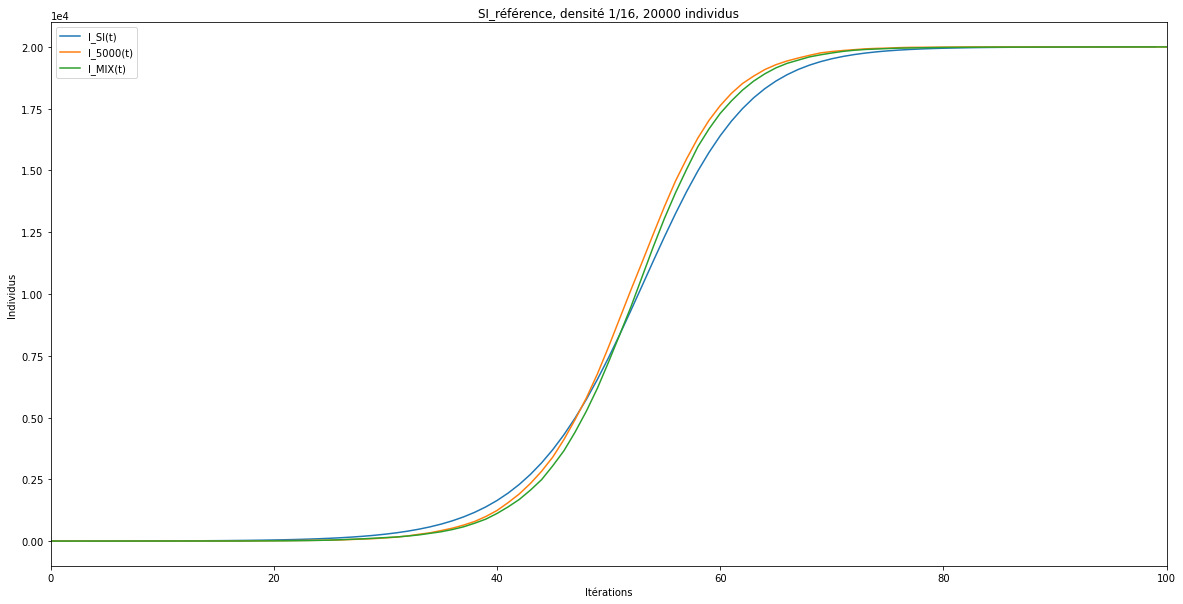

In [58]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.2
iterations = 100

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [59]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  101161.84860065152  pour un paramètre beta =  0.2
MSE minimal (I_MIX,I_SI) :  42599.616251834115  pour un paramètre beta =  0.2
MSE (I_5000,I_MIX) :  23409.58


### 50000 individus

In [60]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population50000"

In [61]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1432  17786281        5      3  17787721
   Init     Run  Mesures  Close   Total
0   420  153731       61      3  154215


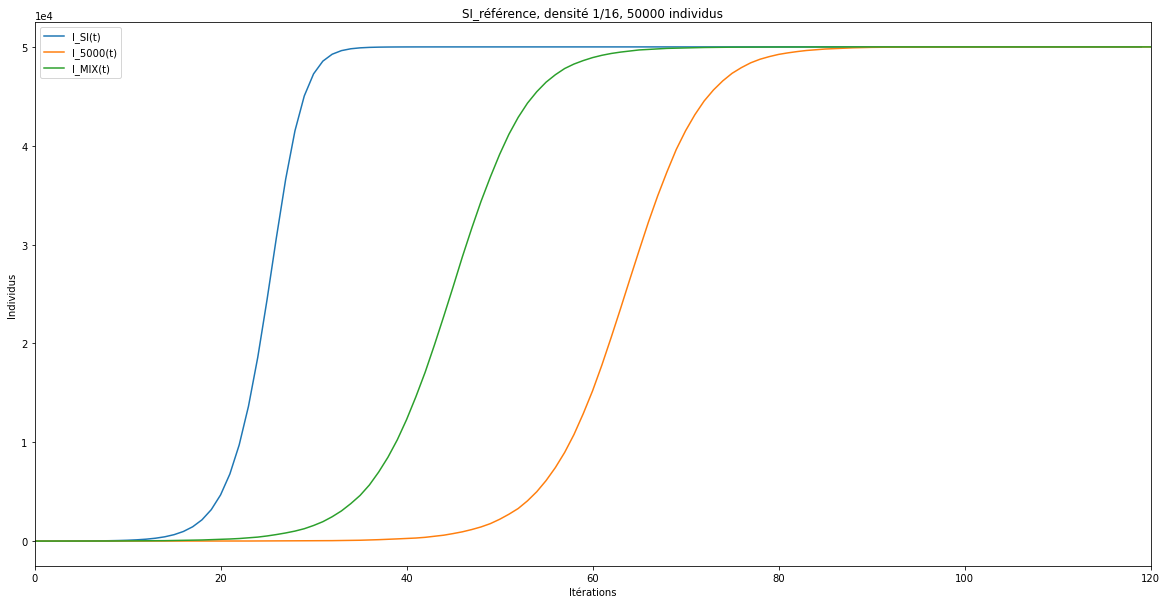

In [62]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.5
iterations = 120

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [63]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  1047079.971676242  pour un paramètre beta =  0.18
MSE minimal (I_MIX,I_SI) :  87966.03097669402  pour un paramètre beta =  0.26
MSE (I_5000,I_MIX) :  135217149.98


### 100000 individus

In [64]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population100000"

In [65]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1436  24800491        4      3  24801935
   Init     Run  Mesures  Close   Total
0  1613  280391       38     47  282090


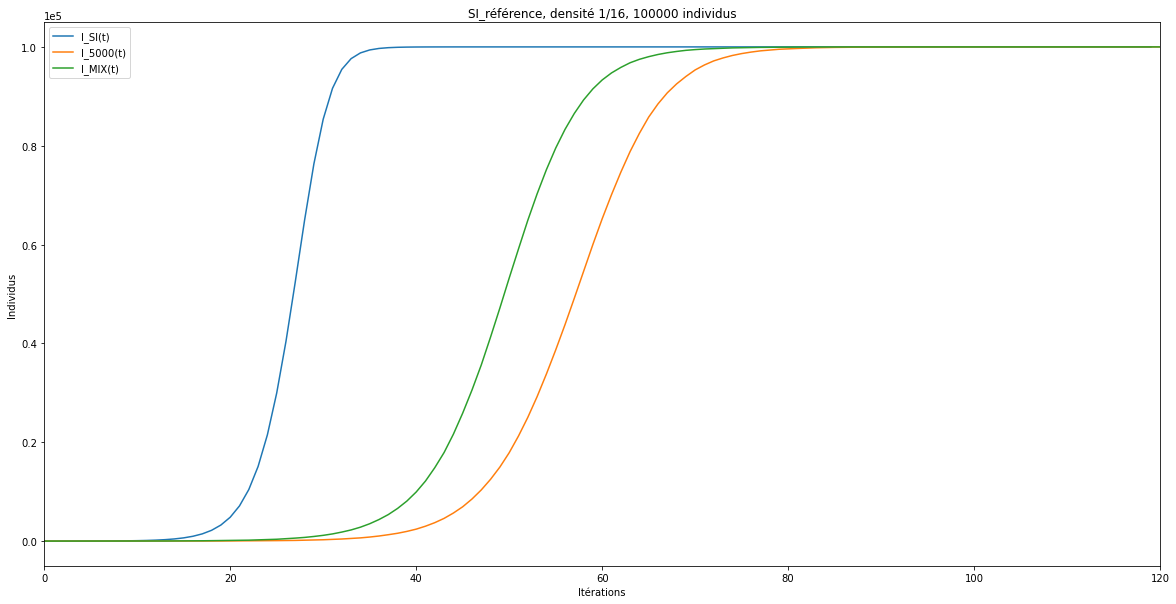

In [66]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.5
iterations = 120

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [67]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  1586823.3171711906  pour un paramètre beta =  0.22
MSE minimal (I_MIX,I_SI) :  297212.08028899896  pour un paramètre beta =  0.25
MSE (I_5000,I_MIX) :  107336039.05
